In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)

In [3]:
df=pd.read_csv('black_friday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()
#product_Category_1 has a lot of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.drop(['Product_Category_3'], axis=1, inplace=True)

In [6]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


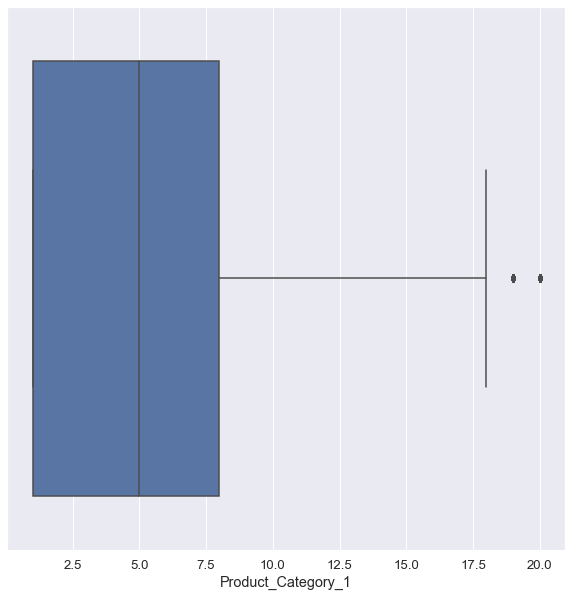

In [7]:
sns.boxplot(x='Product_Category_1', data=df)

In [8]:
pip install datasist

Note: you may need to restart the kernel to use updated packages.


In [10]:
from datasist.structdata import detect_outliers

for col in df.columns:
    try:
        outli = detect_outliers(df, 0, [col])
        col_med = df[col].median()
        df[col].iloc[outli] = col_med
    except:
        continue

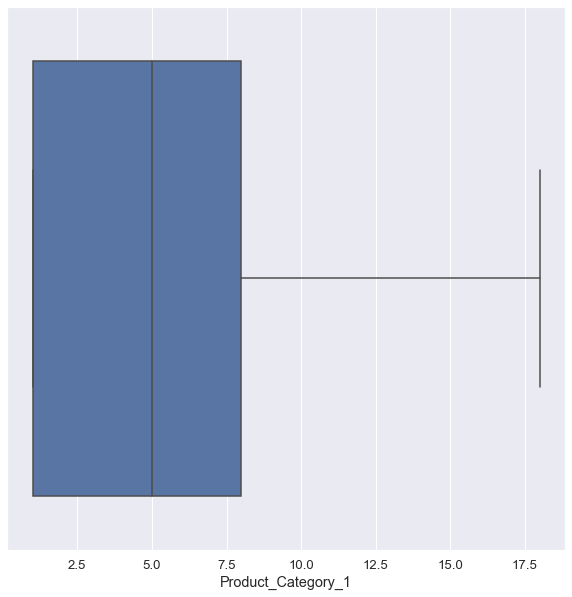

In [11]:
sns.boxplot(x='Product_Category_1', data=df)

In [12]:
from sklearn.model_selection import train_test_split

x = df.drop('Purchase', axis=1)
y = df['Purchase']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
239210,1000921.0,P00288342,M,26-35,17.0,B,1,0.0,8.0,8.0
7866,1001221.0,P00215842,M,18-25,0.0,B,1,0.0,5.0,8.0
347811,1005568.0,P00113342,M,18-25,4.0,C,3,0.0,1.0,8.0
206297,1001794.0,P00338542,M,26-35,11.0,B,1,0.0,1.0,8.0
531799,1003884.0,P00259042,M,18-25,4.0,A,1,1.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...
391212,1000195.0,P00003442,M,26-35,12.0,B,4+,1.0,4.0,5.0
135735,1002975.0,P00102342,M,36-45,11.0,C,1,1.0,8.0,14.0
206597,1001842.0,P00135642,M,18-25,4.0,B,1,0.0,8.0,8.0
22208,1003491.0,P00029542,M,26-35,16.0,B,1,0.0,1.0,2.0
